# 0. Khai báo các thư viện cần thiết

In [ ]:
import pandas as pd
import seaborn as sns

# 1. Đọc dữ liệu từ file Excel

In [ ]:
df = pd.read_excel("https://s3.ap-southeast-1.amazonaws.com/learn.codegym.vn/media/public/2022/01/08185826/house_price_do%CC%82%CC%81ng-da.xlsx")
df.head()

/usr/local/lib/python3.7/dist-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


,title,address,area,price,postDate,land_certificate,house_direction,balcony_direction,toilet,bedroom,floor,type_of_land,street_name,ward_name,district_name,city_name,lat,long
0,Bán nhà Trần Quang Diệu mới coong đẹp 50m2x6 t...,"Đường Trần Quang Diệu, Phường Trung Liệt, Đốn...",50.0,14700.0,2021-01-01,Sổ đỏ,NaN,NaN,4.0,6.0,6.0,Bán nhà riêng\n,Đường Trần Quang Diệu,Phường Trung Liệt,Quận Đống Đa,Thành phố Hà Nội,21.015698,105.824583
1,Bán nhà mặt phố Tây Sơn - 6 tầng. Kinh doanh t...,"Đường Tây Sơn, Phường Trung Liệt, Đống Đa, Hà...",35.0,12500.0,2021-02-19,Sổ đỏ,NaN,NaN,NaN,NaN,6.0,Bán nhà mặt phố\n,Phố Trung Liệt,Phường Trung Liệt,Quận Đống Đa,Thành phố Hà Nội,21.008930,105.824105
2,Bán nhà số 36 Đoàn Kết - phố Khâm Thiên - Đống...,"Số 36 Đoàn Kết, Phố Khâm Thiên, Phường Thổ Qu...",57.0,4200.0,2021-03-10,Sổ đỏ,Nam,Nam,3.0,8.0,4.0,Bán nhà riêng\n,Phố Khâm Thiên,Phường Khâm Thiên,Quận Đống Đa,Thành phố Hà Nội,21.025208,105.833111
3,Bán nhà 6 tầng mới kinh doanh mặt ngõ 1194 Đườ...,"Ngõ 1194, Đường Láng, Phường Láng Thượng, Đố...",62.0,11000.0,2021-03-13,Sổ đỏ,Đông,Đông-Nam,6.0,5.0,6.0,Bán nhà riêng\n,Đường Láng Thượng,Phường Láng Thượng,Quận Đống Đa,Thành phố Hà Nội,21.025379,105.801011
4,"Bán nhà mặt phố Thái Hà 70m2, 5 tầng, 4.5m mặt...","Phố Thái Hà, Phường Trung Liệt, Đống Đa, Hà Nội",70.0,36000.0,2021-03-13,Sổ đỏ,NaN,NaN,NaN,6.0,5.0,Bán nhà mặt phố\n,Phố Trung Liệt,Phường Trung Liệt,Quận Đống Đa,Thành phố Hà Nội,21.009239,105.824230


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   title              1000 non-null   object        
 1   address            1000 non-null   object        
 2   area               994 non-null    float64       
 3   price              944 non-null    float64       
 4   postDate           1000 non-null   datetime64[ns]
 5   land_certificate   693 non-null    object        
 6   house_direction    44 non-null     object        
 7   balcony_direction  24 non-null     object        
 8   toilet             551 non-null    float64       
 9   bedroom            635 non-null    float64       
 10  floor              376 non-null    float64       
 11  type_of_land       1000 non-null   object        
 12  street_name        808 non-null    object        
 13  ward_name          802 non-null    object        
 14  district_

# 2. Xử lý dữ liệu khuyết thiếu và dữ liệu ngoại lai

In [ ]:
na = df.isna()

In [ ]:
temp = df[na.area == False]
temp.reset_index(drop = True, inplace = True)
temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 994 entries, 0 to 993
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   title              994 non-null    object        
 1   address            994 non-null    object        
 2   area               994 non-null    float64       
 3   price              942 non-null    float64       
 4   postDate           994 non-null    datetime64[ns]
 5   land_certificate   693 non-null    object        
 6   house_direction    44 non-null     object        
 7   balcony_direction  24 non-null     object        
 8   toilet             551 non-null    float64       
 9   bedroom            635 non-null    float64       
 10  floor              376 non-null    float64       
 11  type_of_land       994 non-null    object        
 12  street_name        802 non-null    object        
 13  ward_name          797 non-null    object        
 14  district_n

In [ ]:
# lọc ra dataframe chỉ chứa các dữ liệu cần thiết
df1= temp.loc[:, ["area", "price", "bedroom", "house_direction"]]
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 994 entries, 0 to 993
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   area             994 non-null    float64
 1   price            942 non-null    float64
 2   bedroom          635 non-null    float64
 3   house_direction  44 non-null     object 
dtypes: float64(3), object(1)
memory usage: 31.2+ KB


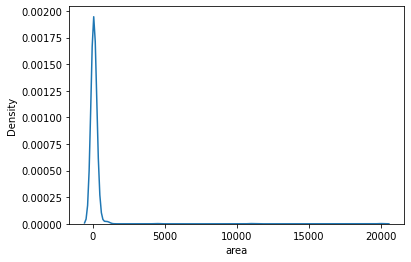

In [ ]:
# Vẽ biểu đồ phân bố dữ liệu của thuộc tính area
sns.kdeplot(x = "area", data = df1)

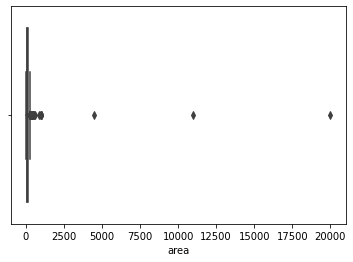

In [ ]:
# Vẽ biểu đồ boxplot của thuộc tính area
sns.boxplot(x = "area", data = df1)

In [ ]:
# Xoá bỏ các dữ liệu ngoại lai của area có diện tích lớn hơn 200 m2
temp = df1[(df1.area > 0) & (df1.area < 200)]

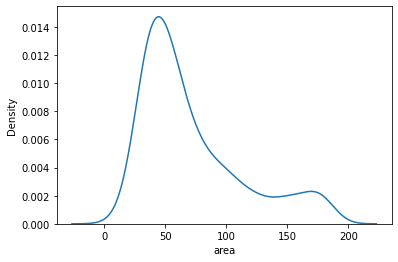

In [ ]:
# Vẽ biểu đồ phân bố dữ liệu của Area trong dataframe temp
sns.kdeplot(x = "area", data = temp)

In [ ]:
temp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 822 entries, 0 to 993
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   area             822 non-null    float64
 1   price            799 non-null    float64
 2   bedroom          536 non-null    float64
 3   house_direction  44 non-null     object 
dtypes: float64(3), object(1)
memory usage: 32.1+ KB


In [ ]:
# Thay thế giá trị khuyết thiếu bằng giá trị nội suy theo các cột
df2 = temp.interpolate(method = "linear", axis = 0).ffill().bfill()

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 822 entries, 0 to 993
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   area             822 non-null    float64
 1   price            822 non-null    float64
 2   bedroom          822 non-null    float64
 3   house_direction  822 non-null    object 
dtypes: float64(3), object(1)
memory usage: 32.1+ KB


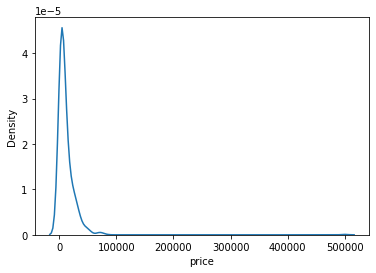

In [ ]:
# Vẽ biểu đồ phân bố dữ liệu của thuộc tính Price
sns.kdeplot(x = "price", data = df2)

In [ ]:
# Xoá bỏ dữ liệu với Price > 18000
temp = df2[(df2.price > 0)&(df2.price < 18000)]
temp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 656 entries, 0 to 992
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   area             656 non-null    float64
 1   price            656 non-null    float64
 2   bedroom          656 non-null    float64
 3   house_direction  656 non-null    object 
dtypes: float64(3), object(1)
memory usage: 25.6+ KB


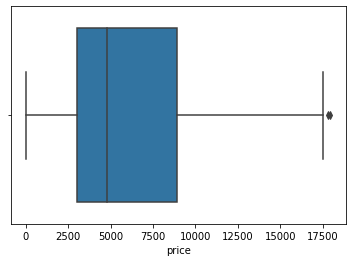

In [ ]:
# Vẽ biểu đồ boxplot của thuộc tính Price
sns.boxplot(x = "price", data = temp)

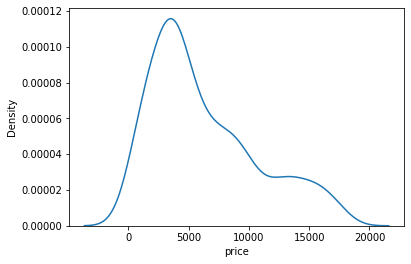

In [ ]:
# Vẽ lại biểu đồ phân bố dữ liệu của thuộc tính Price
sns.kdeplot(x = "price", data = temp)

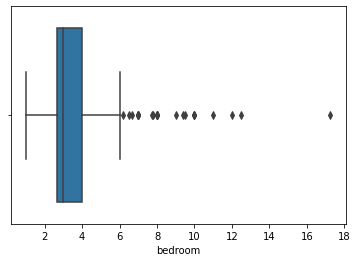

In [ ]:
# vẽ biểu đồ boxplot của thuộc tính bedroom
sns.boxplot(x = "bedroom", data = temp)

In [ ]:
# Xoá bỏ các thuộc tính bedroom có giá trị lớn hơn 6
df3 = temp[temp.bedroom <= 6]

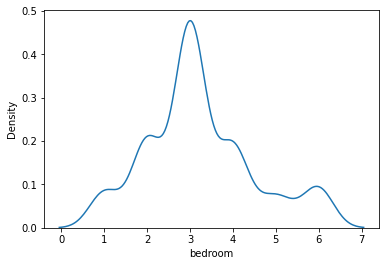

In [ ]:
# Vẽ biểu đồ phân bố dữ liệu của thuộc tính bedroom
sns.kdeplot(x = "bedroom", data = df3)

# 3. Vẽ biểu đồ xu hướng phân tích mối quan hệ giữa giá nhà với diện tích, giá nhà với số lượng phòng ngủ, nhận xét

In [ ]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 631 entries, 0 to 992
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   area             631 non-null    float64
 1   price            631 non-null    float64
 2   bedroom          631 non-null    float64
 3   house_direction  631 non-null    object 
dtypes: float64(3), object(1)
memory usage: 24.6+ KB


In [ ]:
df3.house_direction.unique()

array(['Nam', 'Đông', 'Đông-Nam', 'Tây-Nam', 'Tây-Bắc', 'Bắc', 'Đông-Bắc'],
      dtype=object)

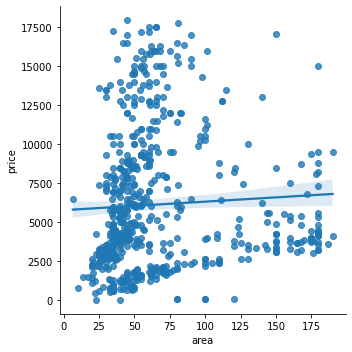

In [ ]:
# Vẽ biểu đồ xu hướng phân tích mối quan hệ giữa giá nhà với diện tích
sns.lmplot(x = "area", y = "price", data = df3)

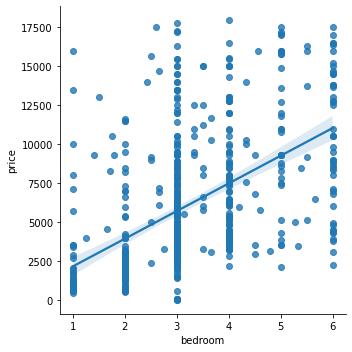

In [ ]:
# Vẽ biểu đồ xu hướng phân tích mối quan hệ giữa giá nhà và số lượng phòng ngủ
sns.lmplot(x = "bedroom", y = "price", data = df3)

# 4. Vẽ biểu đồ phân bố thể hiện phân bố của giá nhà theo các hướng, nhận xét

In [ ]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 631 entries, 0 to 992
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   area             631 non-null    float64
 1   price            631 non-null    float64
 2   bedroom          631 non-null    float64
 3   house_direction  631 non-null    object 
dtypes: float64(3), object(1)
memory usage: 24.6+ KB


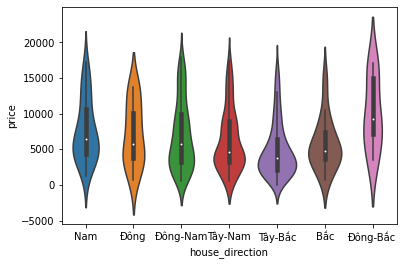

In [ ]:
#Vẽ biểu đồ phân bố của giá nhà theo các hướng
sns.violinplot(x = "house_direction", y = "price", data = df3)

# 5. Vẽ biểu đồ tần số để đếm số nhà ở mỗi hướng nhà, nhận xét.

In [ ]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 631 entries, 0 to 992
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   area             631 non-null    float64
 1   price            631 non-null    float64
 2   bedroom          631 non-null    float64
 3   house_direction  631 non-null    object 
dtypes: float64(3), object(1)
memory usage: 40.8+ KB


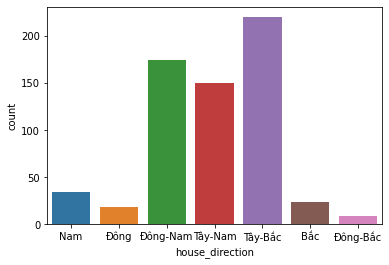

In [ ]:
# Vẽ biểu đồ tần số để đến số nhà ở mỗi hướng
sns.countplot(x = "house_direction", data = df3)

# 6. Vẽ biểu đồ boxplot thể hiện phân bố của giá nhà theo các hướng, nhận xét

In [ ]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 631 entries, 0 to 992
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   area             631 non-null    float64
 1   price            631 non-null    float64
 2   bedroom          631 non-null    float64
 3   house_direction  631 non-null    object 
dtypes: float64(3), object(1)
memory usage: 40.8+ KB


In [ ]:
# Vẽ biểu đồ boxplot thể hiện phân bố giá nhà theo các hướng
sns.boxplot(x = "house_direction", y = "price", )